## Import Libraries

In [12]:
# CS21B2019
# Devarakonda SLR Siddesh
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### Original Image

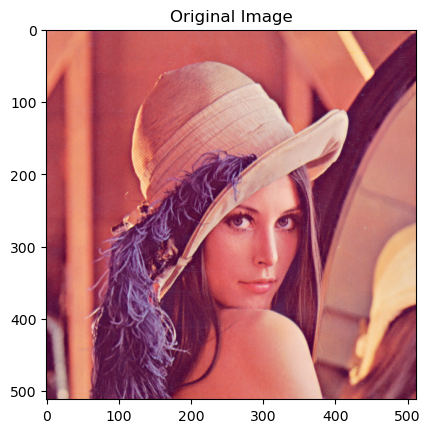

In [13]:
original_image = cv2.imread('Lena.png')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### Gray Scaled Image

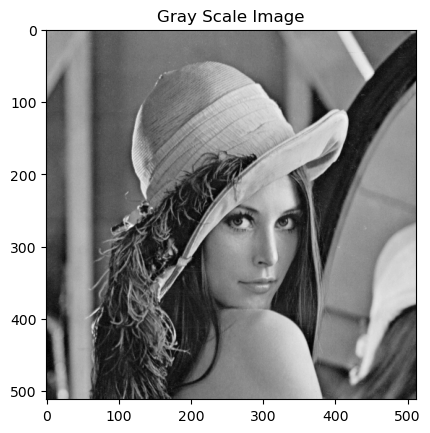

In [14]:
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Gray Scale Image')
plt.show()

## Image Translation

In [15]:
def translate_image(image, dx, dy):
    image_shape = image.shape
    output_image = np.zeros(image_shape, dtype=np.uint8)

    for row in range(image_shape[0]):
        for col in range(image_shape[1]):
            new_row = int(row + dx)
            new_col = int(col + dy)
            if 0 <= new_row < image_shape[0] and 0 <= new_col < image_shape[1]:
                output_image[new_row, new_col] = image[row, col]
    
    return output_image

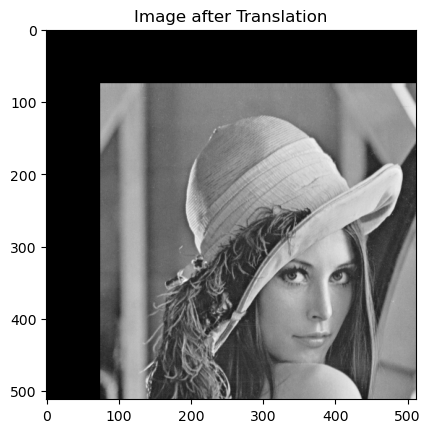

In [16]:
translated_image = translate_image(grayscale_image, 75, 75)
plt.imshow(translated_image, cmap='gray')
plt.title('Image after Translation')
plt.show()

## Image Scaling

In [17]:
def scale_image(image, factor_vector):
    image_shape = image.shape
    output_shape = image_shape * factor_vector
    output_image = np.zeros(output_shape, dtype=np.uint8)

    

    # for getting location of every pixel in original image
    for row in range(image_shape[0]):
        for col in range(image_shape[1]):
            # for every missing pixel in new image, fill it current pixel value
            for i in range(int(factor_vector[0])):
                for j in range(int(factor_vector[1])):
                    new_row = int(row * factor_vector[0]) + i
                    new_col = int(col * factor_vector[1]) + j
                    output_image[new_row, new_col] = image[row, col]
    
    return output_image

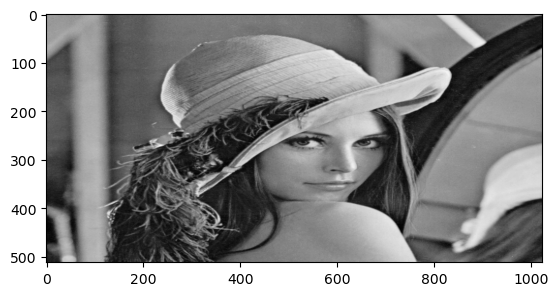

In [18]:
scaled_image = scale_image(grayscale_image, np.array([1, 2]))
plt.imshow(scaled_image, cmap='gray')

## Image Rotation

In [21]:
def rotate_image_padding(image, degree):
    rad = math.radians(degree)
    sin_theta, cos_theta = math.sin(rad), math.cos(rad)
    X_final = round(abs(image.shape[0]*cos_theta)) + round(abs(image.shape[1]*sin_theta))
    Y_final = round(abs(image.shape[1]*cos_theta)) + round(abs(image.shape[0]*sin_theta))
    final_image = np.zeros((X_final, Y_final))
    
    cx, cy = (image.shape[1]//2, image.shape[0]//2)
    midx,midy = (Y_final//2, X_final//2)
    
    for new_row in range(final_image.shape[0]):
        for new_col in range(final_image.shape[1]):
            old_row = (new_row - midx)*cos_theta+(new_col - midy)*sin_theta
            old_col = -(new_row - midx)*sin_theta+(new_col - midy)*cos_theta
            old_row =round(old_row) + cx
            old_col =round(old_col )+ cy
            if (old_row >= 0 and old_col >= 0 and old_row < image.shape[0] and  old_col < image.shape[1]):
                final_image[new_row, new_col] = image[old_row, old_col]

    return final_image

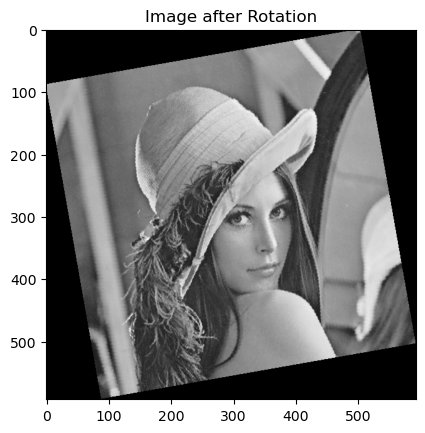

In [22]:
rotated_image_padding = rotate_image_padding(grayscale_image, 10)
plt.imshow(rotated_image_padding, cmap='gray')
plt.title('Image after Rotation')
plt.show()

## Image Shearing

In [23]:
def shear_image(image, shear_value, axis = 0):
    image_shape = image.shape

    if axis == 0:
        shear_matrix = np.array([[1, shear_value], [0, 1]])
    else:
        shear_matrix = np.array([[1, 0], [shear_value, 1]])

    new_x, new_y = np.round(np.dot(shear_matrix, image_shape)).astype(int)
    output_image = np.zeros((new_x, new_y), dtype=np.uint8)
    for row in range(image_shape[0]):
        for col in range(image_shape[1]):
            new_row, new_col = np.dot(shear_matrix, np.array([row, col]))
            new_row = int(new_row)
            new_col = int(new_col)
            if 0 <= new_row < new_x and 0 <= new_col < new_y:
                output_image[new_row, new_col] = image[row, col]
    
    return output_image

### Shearing in X-Direction

Text(0.5, 1.0, 'Image after Shearing in X direction')

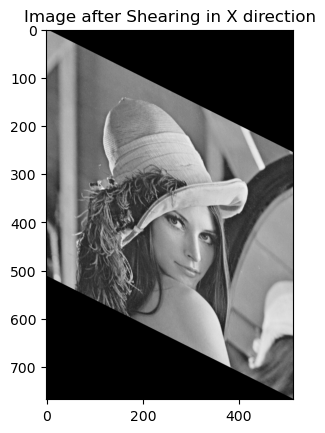

In [24]:
sheared_image = shear_image(grayscale_image, 0.5, axis = 0)
plt.imshow(sheared_image, cmap='gray')
plt.title('Image after Shearing in X direction')

### Shearing in Y-Direction

Text(0.5, 1.0, 'Image after Shearing in Y direction')

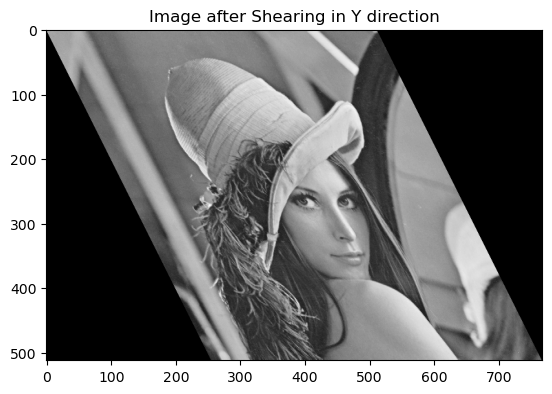

In [25]:
sheared_image = shear_image(grayscale_image, 0.5, axis = 1)
plt.imshow(sheared_image, cmap='gray')
plt.title('Image after Shearing in Y direction')